# Analisando as vendas da empresa
- Vamos utilizar a base disponível em:
    - https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv
    - Essa é uma base de dados real, porém anonimizada
- Na aula anterior, já fizemos o tratamento da base de vendas, resultando no arquivo `vendas_aula3.xlsx`

## Importando a base e gerando o nosso modelo

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando a base já tratada da aula anterior
vendas = pd.read_excel('vendas_aula3.xlsx')

In [3]:
# Verificando os valores nulos da base
vendas.isnull().sum()

Unnamed: 0                          0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_carrier_date      688
order_delivered_customer_date    1845
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
customer_city                       0
customer_state                      0
dia_compra                          0
mes_compra                          0
ano_compra                          0
ano_mes                             0
grupo                               0
dtype: int64

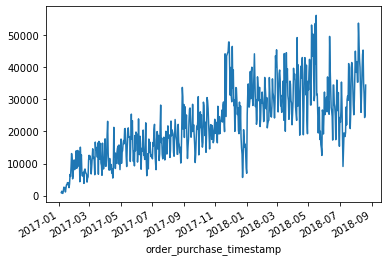

In [5]:
# E os outliers da venda total
vendas.groupby('order_purchase_timestamp')['price'].sum().plot();

### Relembrando a criação do modelo de Machine Learning

In [6]:
# Criando a base com as informações de mês e ano
venda_mesano = vendas.groupby(['order_purchase_timestamp','mes_compra','ano_compra','grupo'])['price'].sum().reset_index()
venda_mesano = pd.concat([venda_mesano,pd.get_dummies(venda_mesano.grupo)],axis=1)
venda_mesano.head(3)

,order_purchase_timestamp,mes_compra,ano_compra,grupo,price,beleza,carro,casa,construção,crianças,eletro_eletronicos,esporte,games,outros,presentes,produtos_diversos,telefonia_audio_video
0,2017-01-06,1,2017,beleza,636.00,1,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-06,1,2017,crianças,159.99,0,0,0,0,1,0,0,0,0,0,0,0
2,2017-01-06,1,2017,games,109.90,0,0,0,0,0,0,0,1,0,0,0,0


In [7]:
# Separando em treino e teste
import datetime as dt

treino = venda_mesano[venda_mesano.order_purchase_timestamp <= dt.datetime(2018,3,1)]
teste = venda_mesano[venda_mesano.order_purchase_timestamp > dt.datetime(2018,3,1)]

**Utilizando a regressão linear** <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [8]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

# Separando X e y para treino
X_treino = treino.drop(['order_purchase_timestamp','grupo','price'],axis=1)
y_treino = treino.price

# Fazendo o fit do modeo
reg = LinearRegression().fit(X_treino, y_treino)

# Fazendo a previsão para a base de teste
X_teste = teste.drop(['order_purchase_timestamp','grupo','price'],axis=1)
y_teste = teste.price

y_pred_reg = reg.predict(X_teste)

**E a árvore de regressão**<br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
https://scikit-learn.org/stable/modules/tree.html#tree

In [9]:
# Importando a árvore de regressão
from sklearn.tree import DecisionTreeRegressor

# Criando o regressor
regressor = DecisionTreeRegressor(random_state=0)

# Fazendo o fit do modelo
regressor.fit(X_treino,y_treino)

# Fazendo a previsão para a base de teste
y_pred_arvore = regressor.predict(X_teste)

**E calculando os erros**
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

In [10]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [11]:
# Analisando o erro na regressão linear
mean_absolute_error(y_teste,y_pred_reg)

1426.5392473920945

In [12]:
# Analisando o erro na árvore de regressão
mean_absolute_error(y_teste,y_pred_arvore)

1515.8149457593688

### Podemos melhorar os parâmetros da árvore de decisão

In [13]:
# Criando o regressor
regressor = DecisionTreeRegressor(random_state=0,max_depth=5)

# Fazendo o fit do modelo
regressor.fit(X_treino,y_treino)

# Fazendo a previsão para a base de teste
y_pred_arvore = regressor.predict(X_teste)

In [14]:
# Analisando o erro na nova árvore
mean_absolute_error(y_teste,y_pred_arvore)

1410.7095502380175

In [15]:
for i in range(1,20):
    print(i)
    # Criando o regressor
    regressor = DecisionTreeRegressor(random_state=0,max_depth=i)

    # Fazendo o fit do modelo
    regressor.fit(X_treino,y_treino)

    # Fazendo a previsão para a base de teste
    y_pred_arvore = regressor.predict(X_teste)   
    
    # Analisando o erro na nova árvore
    print(mean_absolute_error(y_teste,y_pred_arvore))

1
1479.470699932905
2
1350.6020307667957
3
1476.329349434448
4
1389.5748069222627
5
1410.7095502380175
6
1423.0800307126863
7
1349.6478409168199
8
1324.3767520233964
9
1310.715278520996
10
1380.8285512820514
11
1494.6193997256794
12
1487.7440461130382
13
1488.6608166700673
14
1515.8149457593688
15
1515.8149457593688
16
1515.8149457593688
17
1515.8149457593688
18
1515.8149457593688
19
1515.8149457593688


<a id='menor_erro'></a>
**Até o momento, esse é o modelo com menor erro**

In [16]:
# Criando o regressor
regressor = DecisionTreeRegressor(random_state=0,max_depth=9)

# Fazendo o fit do modelo
regressor.fit(X_treino,y_treino)

# Fazendo a previsão para a base de teste
y_pred_arvore = regressor.predict(X_teste)

# Analisando o erro na nova árvore
mean_absolute_error(y_teste,y_pred_arvore)

1310.715278520996

### Agora testando o Support Vector Regression
- https://scikit-learn.org/stable/modules/svm.html#regression

In [17]:
# Importando o SVR

In [18]:
# Criando o nosso regressor

In [ ]:
# Fazendo o fit do modelo

In [ ]:
# Prevendo para os dados de teste

In [ ]:
# Calculando o erro médio absoluto

### Fazendo ajustes na base para tentar melhorar o modelo

**Podemos manter apenas alguns grupos**

In [ ]:
# Verificando novamente o X_treino

In [ ]:
# Verificando quais itens mais aparecem nessa base utilizando o .sort_values()

In [ ]:
# E se mantivermos apenas as colunas de casa, beleza e esporte?

In [ ]:
# Criando o regressor

In [ ]:
# Fazendo o fit do modelo

In [ ]:
# Fazendo a previsão para a base de teste

In [ ]:
# Analisando o erro na nova árvore

# Persistindo o modelo
- https://scikit-learn.org/stable/model_persistence.html

**Qual modelo eu quero persistir?**
- Vamos usar aquele com [menor erro](#menor_erro)!

In [ ]:
# Qual modelo eu quero persistir?

In [ ]:
# Importando o joblib

In [ ]:
# Fazendo o dump do nosso modelo

In [ ]:
# Exportando a base de teste para csv